# 1. Importing libraries and loading data

In [404]:
import numpy as np
import pandas as pd
car_df = pd.read_csv('/content/car_age_price.csv')
car_df.head()


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# 2. Analysing the data

In [405]:
car_df.shape

(112, 2)

In [406]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [407]:
car_df.describe()


,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [408]:
car_df.isnull().sum()

Year     0
Price    0
dtype: int64

In [409]:
car_df.sort_values(by = 'Year')

,Year,Price
53,2013,345000
52,2013,345000
50,2013,325000
73,2013,320000
81,2014,390000
...,...,...
10,2019,500000
99,2020,600000
98,2020,700000
39,2020,545000


In [410]:
car_df['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

### visualisation of the data

[Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '22'),
 Text(0, 0, '6'),
 Text(0, 0, '47'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

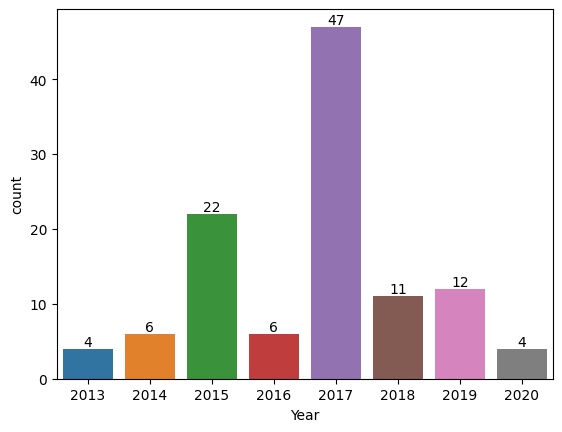

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
count = sns.countplot(x='Year', data = car_df)
count.bar_label(count.containers[0])

<ipython-input-412-6027fa4cf823>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df.Price)


<Axes: xlabel='Price', ylabel='Density'>

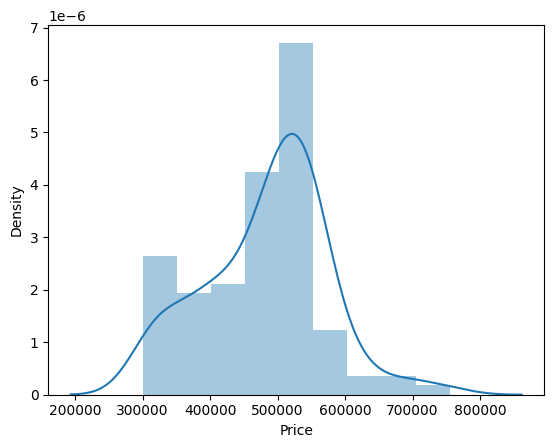

In [412]:
sns.distplot(car_df.Price)

<Axes: xlabel='Year', ylabel='Price'>

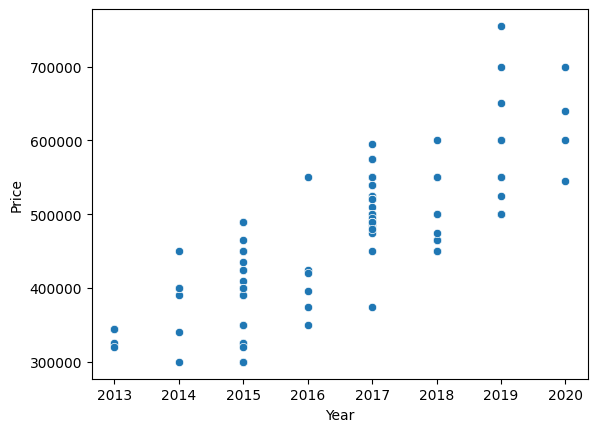

In [413]:
sns.scatterplot(x = 'Year', y = 'Price', data = car_df)

<Axes: xlabel='Price'>

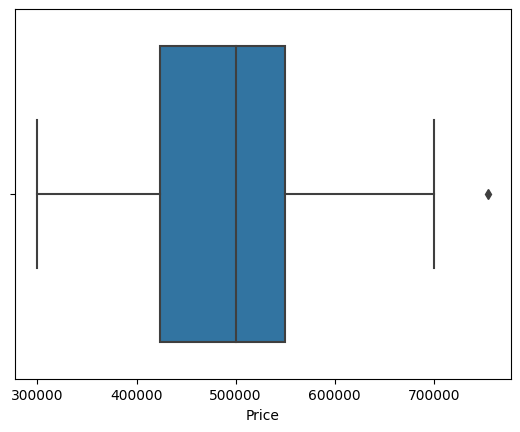

In [414]:
sns.boxplot(x='Price', data = car_df)

# 3. Preprocessing the Data by eliminating the outliers

##   finding outlier

In [415]:
price=car_df['Price']
z_score = (price - price.mean())/price.std()
z_score.mean()
threshold = 2.5
outliers = car_df[abs(z_score) > threshold]
outliers

,Year,Price
1,2019,755000


## finding the boundary values

In [416]:
h = car_df['Price'].mean()+ 2.5*car_df['Price'].std()
l= car_df['Price'].mean()- 2.5*car_df['Price'].std()
print("Highest allowed price = h =",h)
print("lowest allowed price = l =",l)

Highest allowed price = h = 711909.6709750612
lowest allowed price = l = 255822.41831065304


## finding the outlier

In [417]:
car_df[(car_df['Price']>h)|(car_df['Price']<l)]

,Year,Price
1,2019,755000


## eliminating or trimming the outlier from the dataset

In [418]:
new_df= car_df[(car_df['Price']<h) & (car_df['Price']>l)]

In [419]:
new_df

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


## analysing the new data set

In [420]:
new_df.shape

(111, 2)

In [421]:
new_df.describe()

,Year,Price
count,111.000000,111.000000
mean,2016.648649,481423.396396
std,1.621720,87874.563371
min,2013.000000,300000.000000
25%,2015.000000,422500.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,700000.000000


<Axes: xlabel='Price'>

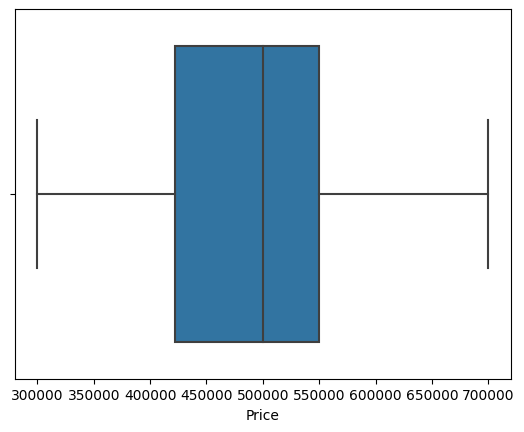

In [422]:
sns.boxplot(x='Price', data = new_df)

<ipython-input-423-95b1f636debf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.Price)


<Axes: xlabel='Price', ylabel='Density'>

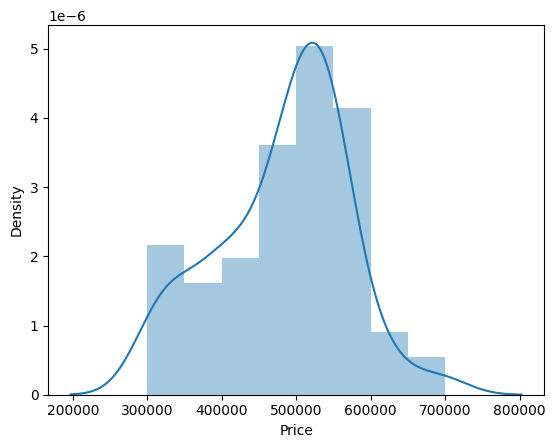

In [423]:
sns.distplot(new_df.Price)

<Axes: xlabel='Year', ylabel='Price'>

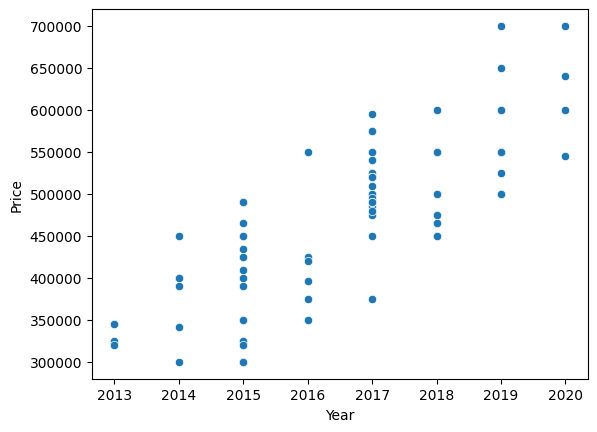

In [424]:
sns.scatterplot(x = 'Year', y = 'Price', data = new_df)

# 4. Checking the correlation btw the given columns by a heat map

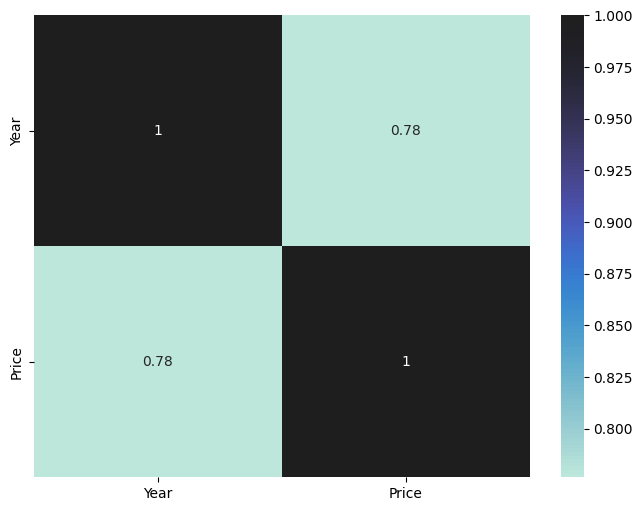

In [425]:
plt.figure(figsize = (8,6))
sns.heatmap(new_df.corr(),annot=True, center = 1)
plt.show()

In [426]:
new_df.corr()

,Year,Price
Year,1.000000,0.776449
Price,0.776449,1.000000


# 5. Seperating data into feature and label

In [427]:
X= np.array(new_df[['Year']])
y= np.array(new_df['Price'])
y= y.reshape(-1,1)

# 6. splitting into text data and train data

In [428]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42, shuffle= True)

In [429]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(88, 1) (88, 1) (23, 1) (23, 1)


# 7. Model creation

In [430]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#8. Validation using trained data

In [431]:
y_pred_train = model.predict(X_train)

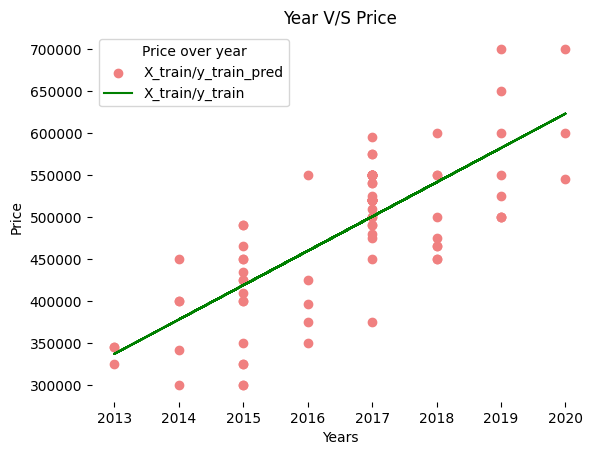

In [432]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'Green')
plt.title('Year V/S Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend(['X_train/y_train_pred', 'X_train/y_train'], title = 'Price over year', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [433]:
from sklearn import metrics
y_pred_train = model.predict(X_train)
print("Mean Absolute Error on trained data = ", metrics.mean_absolute_error(y_train,y_pred_train) )

Mean Absolute Error on trained data =  47259.745139606806


# 9. Evaluating using test data

In [434]:
y_pred_test = model.predict(X_test)

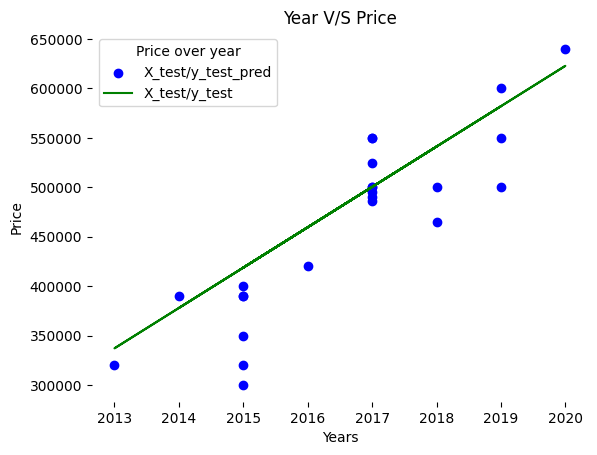

In [435]:
plt.scatter(X_test, y_test, color = 'Blue')
plt.plot(X_test, y_pred_test, color = 'Green')
plt.title('Year V/S Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend(['X_test/y_test_pred', 'X_test/y_test'], title = 'Price over year', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [436]:
print("Mean Absolute Error on test data =", metrics.mean_absolute_error(y_test,y_pred_test))

Mean Absolute Error on test data = 37050.25925992429


# 10. Prediting the possible price of 2022 model second hand grand i10

In [437]:
y_pred = model.predict([[2022]])
print("predicted price =", y_pred)

predicted price = [[704536.23267838]]


Lasso Regression

In [438]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 46529.892 (9243.979)


Lasso regression found to be having lesser Mean Absolute Square Error compared to linear Regression.
 There fore Lasso Regression is the better one.
 However it is more used in dataset having more no. of features.